# This example shows how to create Jackiw-Rebbi solitons in a honeycomb nanoribbon
### Import the necessary libraries

In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")


# import numpy and pyqula
import numpy as np
import matplotlib.pyplot as plt
from pyqula import geometry

### Create the geometry of the honeycomb lattice model, and its first neighbor Hamiltonian
$$ H = \sum_{\langle ij \rangle} c^\dagger_i c_j $$
where $\langle ij \rangle $ denotes first neighbors in the honeycomb lattice

In [2]:
g = geometry.honeycomb_zigzag_ribbon(20) # create the geometry
h = g.get_hamiltonian() # create hamiltonian of the system
hs = h.copy() # create a copy of the Hamiltonian, which will have the soliton solution

### We now include a sublattice imbalance term
In one case, we will consider a uniform sublattice imbalance.
In the other case, we will create a domain wall between positive and negative sublattice imbalance

In [3]:
h.add_sublattice_imbalance(0.5) # same sublattice imbalance everywhere 
hs.add_sublattice_imbalance(lambda r: np.sign(r[1])*0.5) # domain wall in the sublattice imbalance

### Diagonalize the Bloch Hamiltonians
The following function will obtain the Bloch eigenvalues $\epsilon_k$ defined as
$$ H \left | \Psi_k \right \rangle = \epsilon_k \left | \Psi_k \right \rangle $$

In [4]:
(k,e) = h.get_bands() # get the bandstructure
(ks,es) = hs.get_bands() # get the bandstructure

### Plot the Bloch band structure in the path

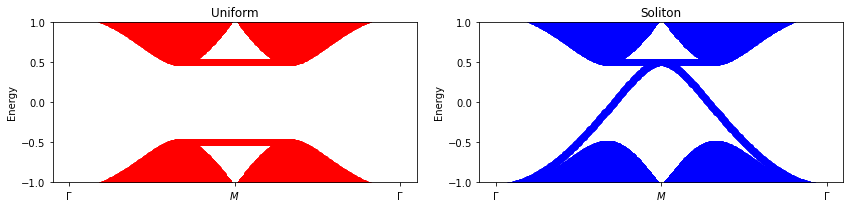

In [5]:
fig = plt.figure(figsize=(12, 3)) # set the right ratio
plt.subplot(121)
plt.title("Uniform")
plt.scatter(k/max(k),e,c="red") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,0.5,1.],["$\Gamma$","$M$","$\Gamma$"])
plt.ylim([-1.,1.])


plt.subplot(122)
plt.title("Soliton")
plt.scatter(ks/max(ks),es,c="blue") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,0.5,1.],["$\Gamma$","$M$","$\Gamma$"])
plt.ylim([-1.,1.])

plt.tight_layout()
plt.show()

